In [9]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [13]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:10]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [14]:
my_data.shape

(200, 6)

In [17]:
#Feature matrix
X= my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:10]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

In [18]:
 #Sklearn Decision Trees do not handle categorical variables.
  #convert categoriccal using label encoder
  
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
  
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])
  
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])
X[0:10]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607000000000001],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368]], dtype=object)

In [19]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier(criterion='entropy')
decTree.fit(X_train, y_train)
y_pred = decTree.predict(X_test)

decTree.feature_importances_

array([0.09749785, 0.        , 0.3295848 , 0.05454991, 0.51836744])

In [21]:
print (y_pred [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [22]:
print (y_test [0:5])

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('Decision tree accuracy:' ,metrics.accuracy_score(y_test, y_pred))

Decision tree accuracy: 0.9833333333333333


In [24]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

      drugA       1.00      1.00      1.00         7
      drugB       1.00      1.00      1.00         5
      drugC       1.00      1.00      1.00         5
      drugX       1.00      0.95      0.98        21
      drugY       0.96      1.00      0.98        22

avg / total       0.98      0.98      0.98        60



In [25]:
print(confusion_matrix(y_test, y_pred))

[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


In [27]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



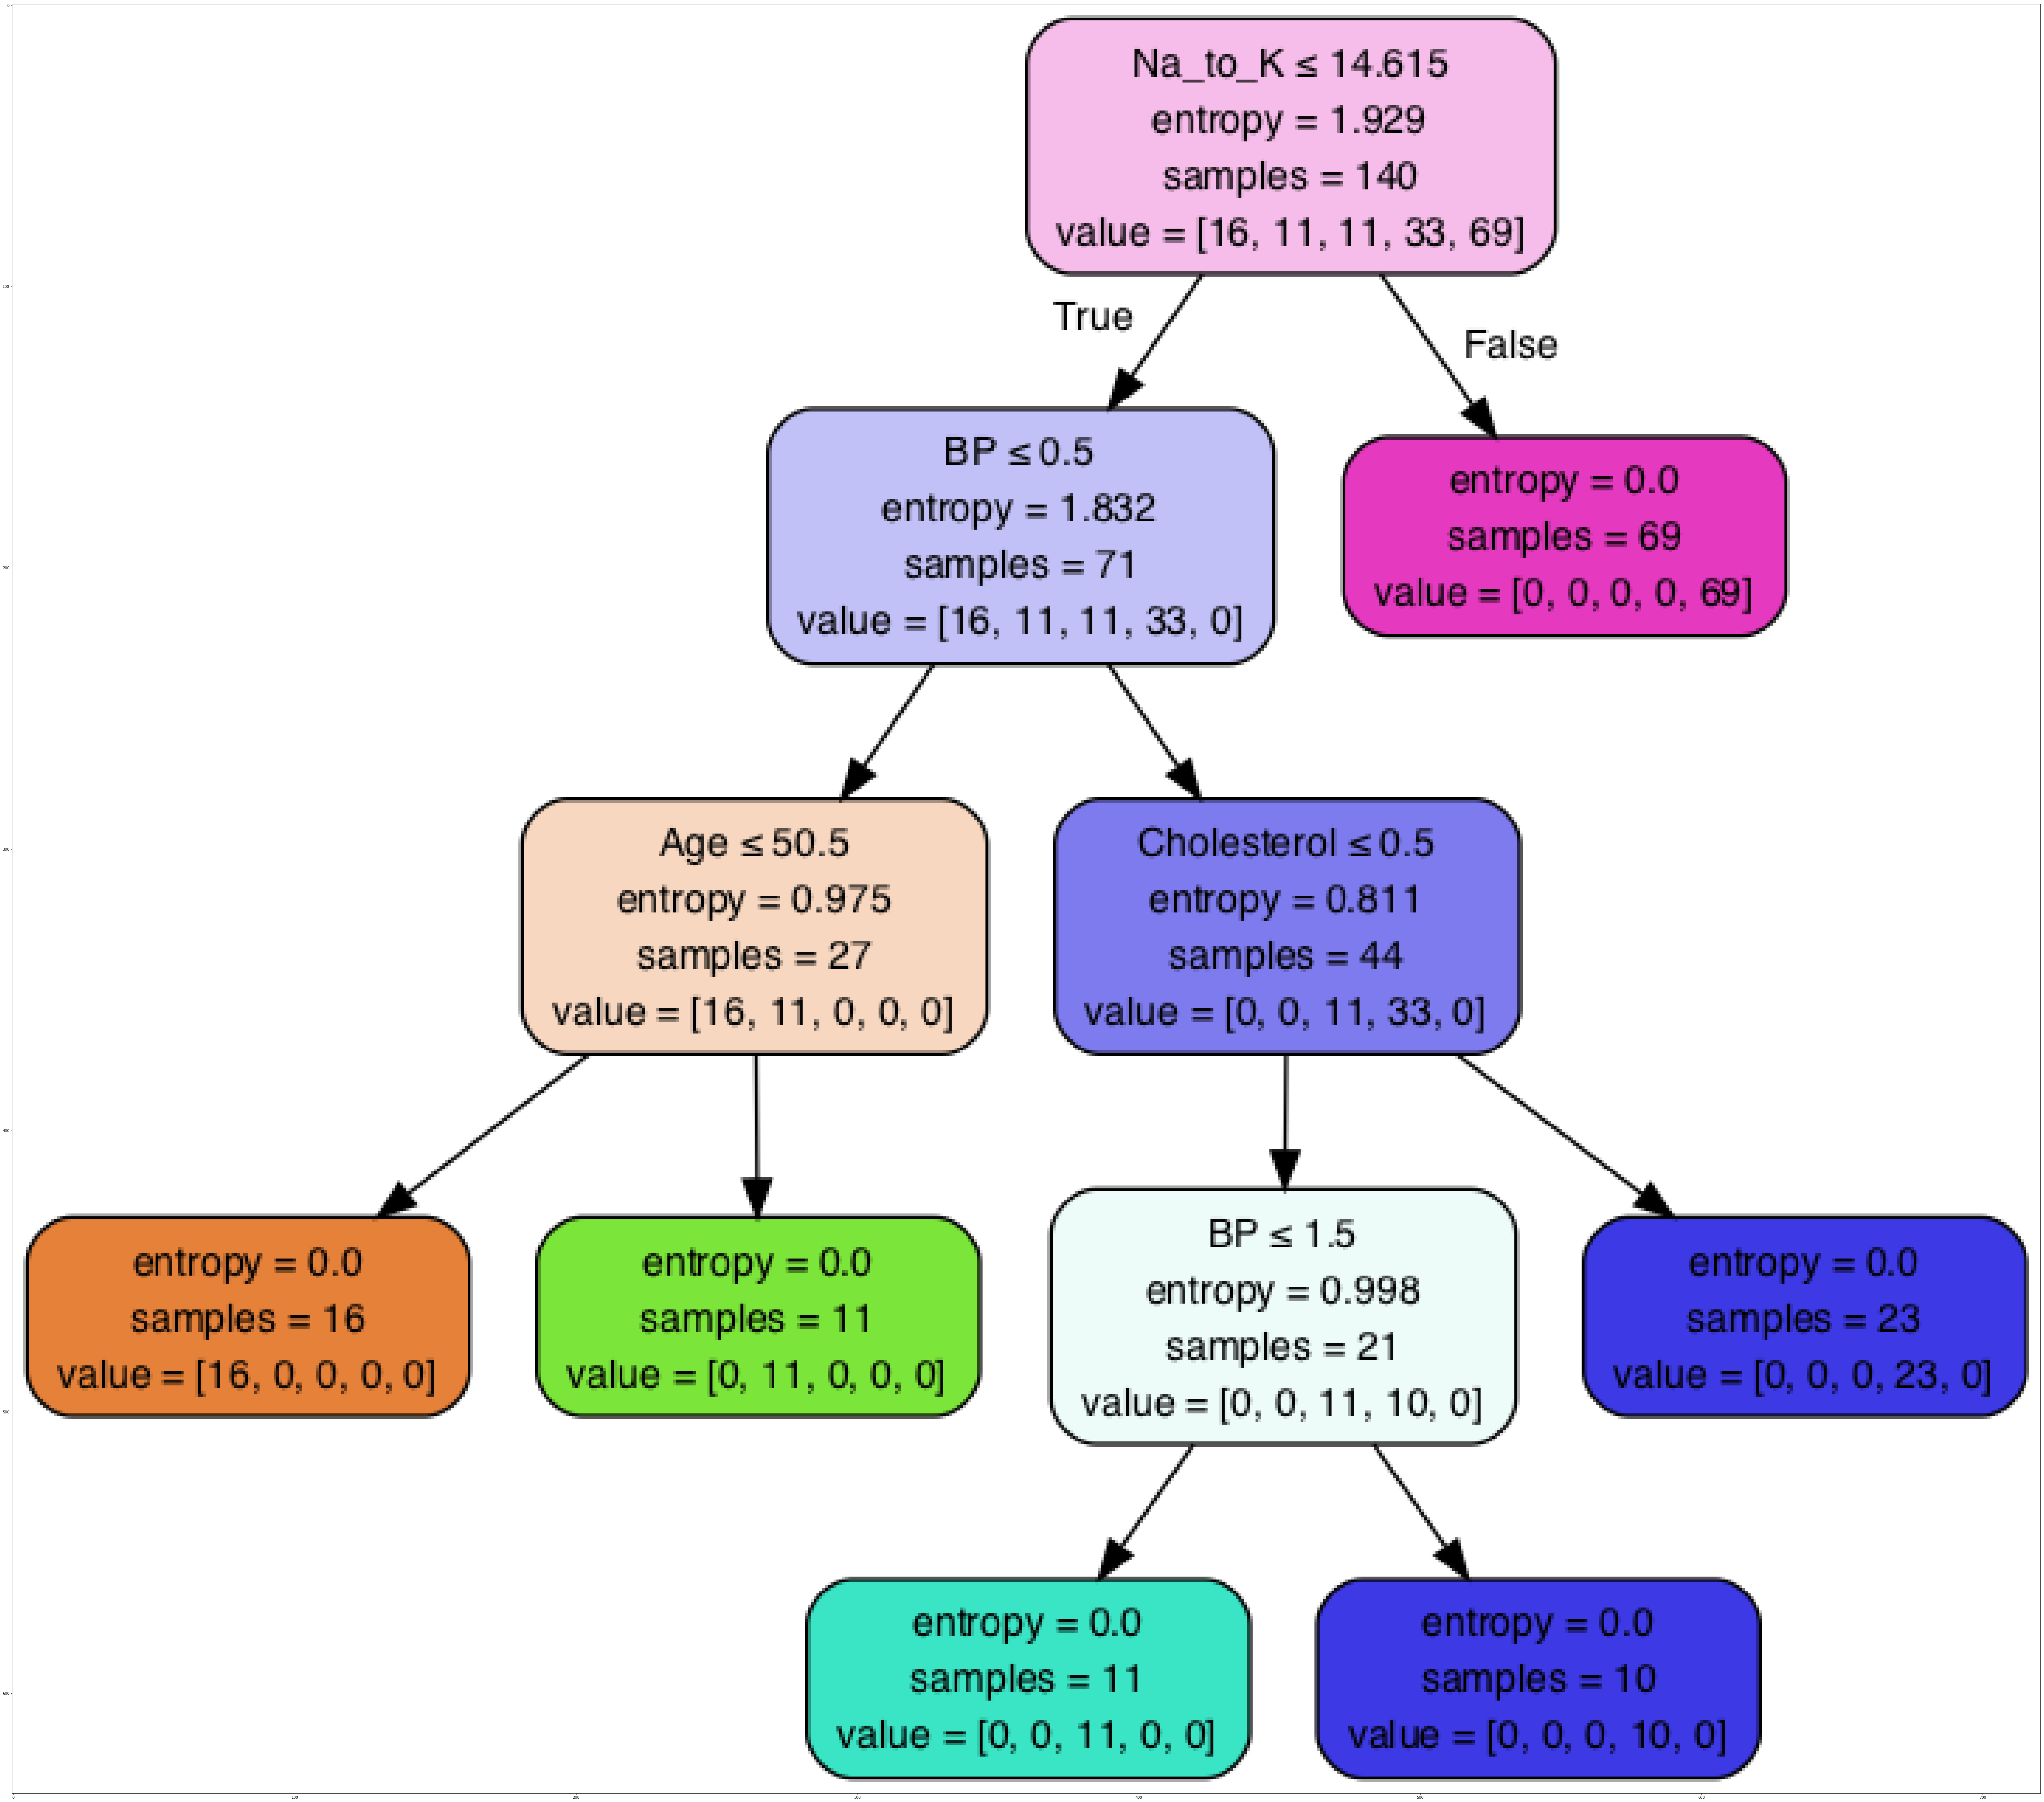

In [32]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.image as mpimg
dot_data = StringIO()
featureNames = my_data.columns[0:5]
export_graphviz(decTree, feature_names = featureNames, out_file=dot_data,  filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("dectree.png")
img = mpimg.imread("dectree.png")
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')